# Исследование объявлений о продаже квартир

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data_ceiling = data.query('total_area < 50 and rooms < 3')                            # посчитам высоту комнат, по медиаоне квартир , попробуем по площади и комнатам оставить толлько панельки
data_ceiling['ceiling_height'].value_counts().head(20).sort_values(ascending = False)
data_ceiling['ceiling_height'].median()

2.6

### Вывод

Данные требуют предобработки, очевидно. Необходимо обработать пропуски и изменить типы данных, сразу бросается в глаза дата и время в формате object.

Возможные причины и методы работы с пропускми:

 - ceiling_height: при заполнении объвления.люди могут пренебрегать вводом этой информации, заменим ее на медианную по стандартным планирвкам
 - living_area: возможно не введнеы данные пользователя, так как люди не всегда знают и понимают отличие жилой от всей площади. либо технический сбой, нам необходимы эти данные для работы, заполним их через коэффициент, рассчитанный отношением медианной общей площади к мдианной жилойю
 - is_apartment, эти данные для работы нам не нужны, но пропуски, очевидно, значат False - не студия
 - kitchen_area: аналогично жилой площади
 - days_exposition: пропуски в тех объвлениях, корорые еще не закрыты

Ошибки в данных по растоянию, предположительно, связаны с некорреткным укзанием адреса пользователями.

### Шаг 2. Предобработка данных

In [7]:
living_area = data.query('living_area.notnull()')
living_area_part = living_area['living_area'].median()/living_area['total_area'].median() # коэффициент отношения жилой площади к общей для заполнения пропусков
kitchen_area = data.query('kitchen_area.notnull()')
kitchen_area_part = kitchen_area['kitchen_area'].median()/kitchen_area['total_area'].median() # коэффициент отношения  площади кухни к общей для заполнения пропусков

In [8]:
data['balcony'] = data['balcony'].fillna(0)   # заменим пропуски в балконах на 0
data['ceiling_height'] = data['ceiling_height'].fillna(data_ceiling['ceiling_height'].median())  # заменим пропуски в высоте потолков медианным значением для распространенных квартир
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') # переведем дату в соотв формат
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_part)    # заполним отсутствие данных жилой площади с помощью примениния медианного коэффициента к общей площади
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_area_part)  # аналогично с кухней
data['ceiling_height'].value_counts()
data.query('ceiling_height == 100')                                                         # интересный объект


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [9]:
data.query('last_price > 500000000')             # интересный вариант

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,2.6,10.0,250.0,10,NaN,...,69.333333,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


### Шаг 3. Посчитайте и добавьте в таблицу

In [10]:
data['price_per_meter'] = data['last_price'] / data['total_area'] # посчитаем цену за кв метр
                                                                 
data['first_day_day'] = data['first_day_exposition'].dt.weekday   # день недели, месяц и год публикации объявления
data['first_day_month'] = data['first_day_exposition'].dt.month
data['first_day_year'] = data['first_day_exposition'].dt.year
data['att_living_total'] = data['living_area'] / data['total_area']
data['att_kitchen_total'] = data['kitchen_area'] / data['total_area']

def floor_group(row):                                              # создаем функцию для выбора группы этажа
    if row['floor'] == 1: 
        return 'Первый'
    if row['floor'] == row['floors_total']: 
        return 'Последний'
    return 'Другой'
data['floor_group'] = data.apply(floor_group, axis = 1)             #  применяем функцию к таблице


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [11]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [12]:
data['total_area'].describe()


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [13]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [14]:
data['ceiling_height'].describe()                # минимальная высота - 1
                                                                       


count    23699.000000
mean         2.704959
std          0.990057
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

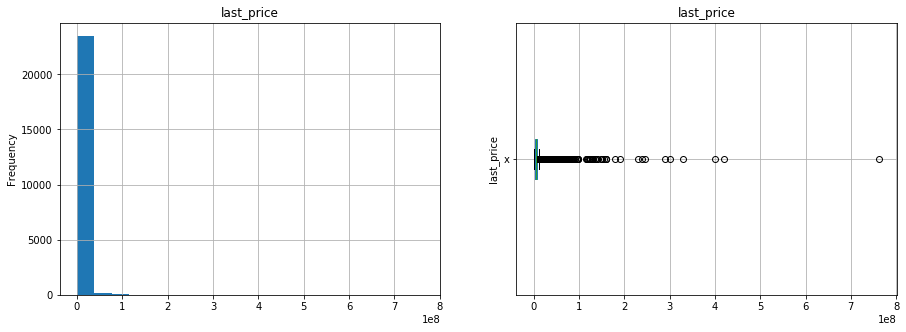

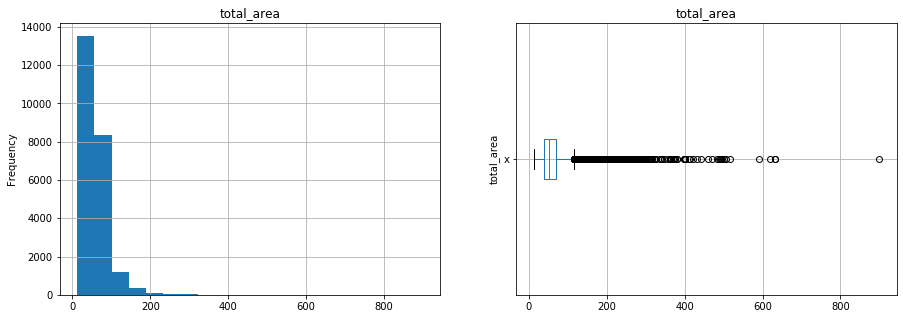

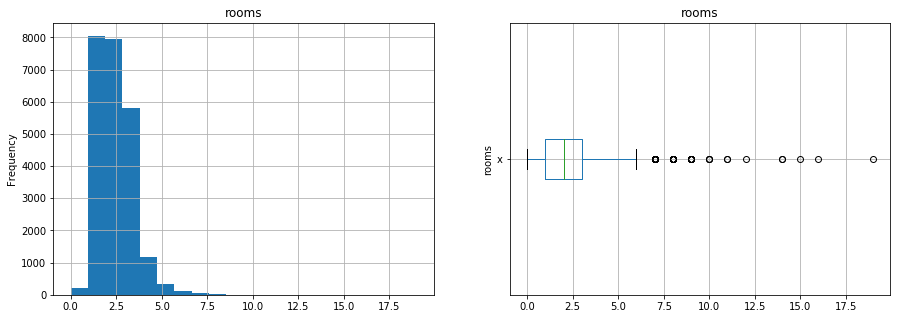

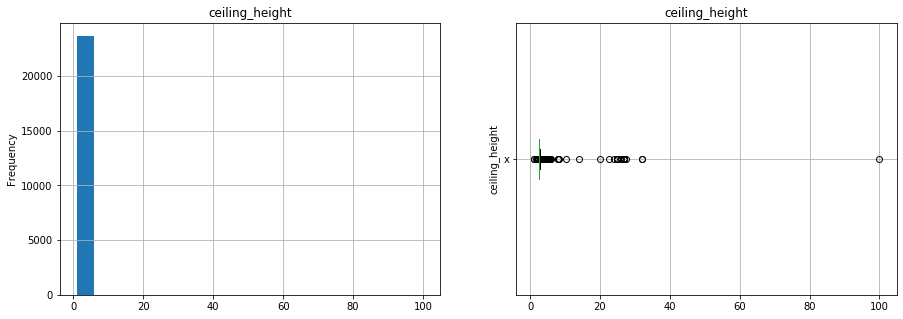

In [62]:
# 
cols =['last_price','total_area','rooms','ceiling_height']

for col in cols:
    fig, axes = plt.subplots(1,2, figsize=(15,5))
    data[col].plot(ax=axes[0], kind = 'hist', grid = True, bins = 20,  title= col,  )
    plt.ylabel(col)
    plt.title(col)
    pd.plotting.boxplot(data[col], ax=axes[1], vert=False)
    
    

<font color=green> Хороший способ автоматизации. Будет совсем здорово, если добавишь расчет граничных условий для гистограммы. Т.е. лучше строить не весь диапазон значений, а ограничить его. Также важно делать название графиков и подписи осей.
    
---

### Промежуточный вывод, по площади, цене, числу комнат мы имеем нормальное распредление, с выбросами в большую сторону.
### Высота потолков, в основной массе вращается вокруг 2.5 - 3 м

In [16]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f492dd52050>]],
      dtype=object)

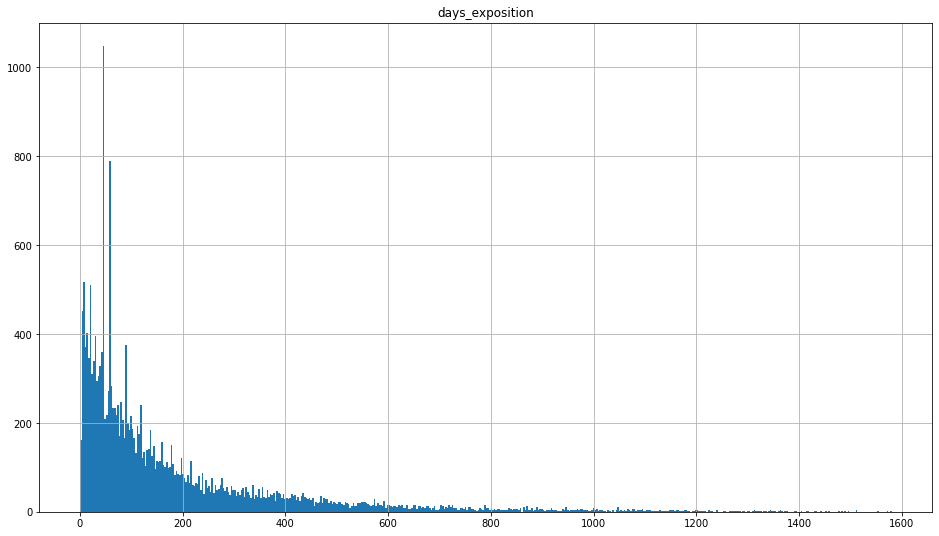

In [17]:
data.hist('days_exposition', bins = 500, range =(0,1580), figsize = (16,9))

### Медианное время продажи квартиры - три месяца, среднее - шесть.
### Очень долгим можно считать процесс продажи, затянувшийся более чем на 400 дней.
### Быстрые продажи - меньше чем за месяц.


In [18]:
data_price_min = data.query('last_price < 1210000')   # проверка населенных пунктов с минимальной ценой
data_price_min['locality_name'].value_counts()

Сланцы                97
Кириши                27
Волхов                19
Пикалёво              14
Бокситогорск          14
                      ..
посёлок Шугозеро       1
поселок Торковичи      1
посёлок Алексеевка     1
деревня Бор            1
деревня Котлы          1
Name: locality_name, Length: 123, dtype: int64

(-100, 2000)

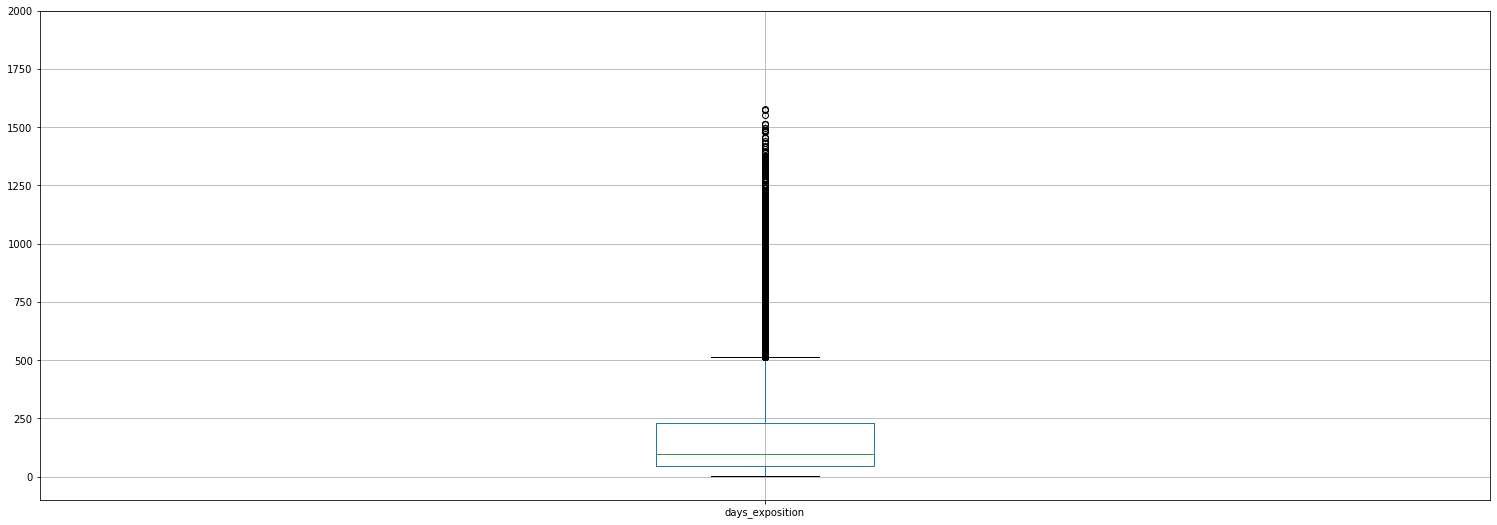

In [19]:
data.boxplot('days_exposition', figsize = (26, 9))
plt.ylim(-100, 2000)

Изучив гистограммы и графики разброса с описаниями данных, я сделал следующие выводы:
 - Основная масса обявлений до 20 млн р, но встречаются и более дорогие варианты, которые нельзя считать выбросами, как напрмер кв за 700000000 руб., поэтому я сделал срез по стоимости квартир до 75%. округив до 70 млн руб, что можно заметить и в графике разброса значений
 - Срез по общей площади я ограничил 250 м, на основании изучения графиков
 - Плотность данных по количеству комант падает после 6 комнат, по этому значению я и сделал срез
 - Изучив описание распределения данных по высоте потолков, я принял решения ограничить 25ю метрами, так на этой гранцие тожеимеется некорое количетсво данных. плотно расположенных, и возможно, интеренсых для анализа, если они будут соответствоать по праметрам цены
 - И по результатам анализа данных времени продажи квартир, стало ясно, что если квартира продается больше года, она имеет некоторые несоответствия распространненым параметрам квартир, и нам лучше ее исключить из вводных данных. 

In [20]:
data_good = data.query('last_price < 70000000 and total_area < 250  and rooms < 6 and ceiling_height < 25 and days_exposition < 365')  # уберем выбросы по цене до 3го процентиля
data_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17299 entries, 1 to 23695
Data columns (total 29 columns):
total_images            17299 non-null int64
last_price              17299 non-null float64
total_area              17299 non-null float64
first_day_exposition    17299 non-null datetime64[ns]
rooms                   17299 non-null int64
ceiling_height          17299 non-null float64
floors_total            17232 non-null float64
living_area             17299 non-null float64
floor                   17299 non-null int64
is_apartment            1967 non-null object
studio                  17299 non-null bool
open_plan               17299 non-null bool
kitchen_area            17299 non-null float64
balcony                 17299 non-null float64
locality_name           17261 non-null object
airports_nearest        13298 non-null float64
cityCenters_nearest     13316 non-null float64
parks_around3000        13316 non-null float64
parks_nearest           5666 non-null float64
ponds_a


### Промежуточный вывод: Детально рассмотрев данные, можно увидеть большое количество выбросов. Интересные варианты квартир за  ок.800 млн руб, или квартира высотой 100м с пятью балконами и площалью 25 кв. м.



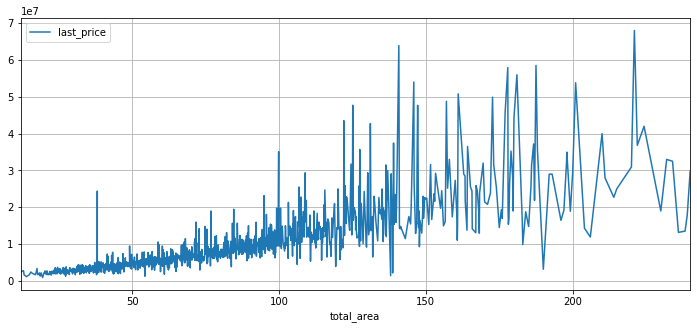

In [21]:
data_good.pivot_table(index='total_area', values='last_price').plot(grid = True, figsize=(12, 5)) 

**В целом видна тенденция чем больше площадь, тем больше  цена, но есть и разброс, видимо зависящий от влияний третьих факторов, котрый появлется на квартирах более 100 кв м**

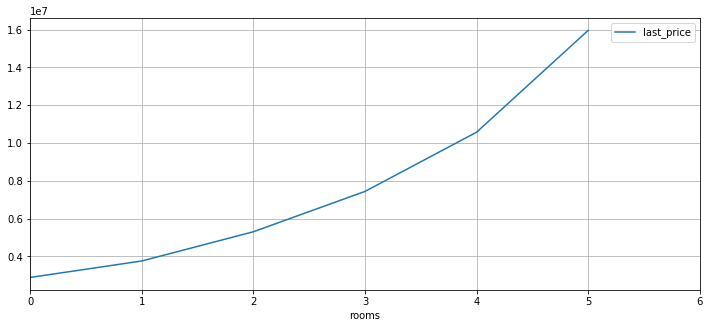

In [22]:
data_good.pivot_table(index='rooms', values='last_price').plot(xlim =(0,6), grid = True, figsize=(12, 5)) 
plt.show()

**Чем больше комнат, тем дороже квартира**

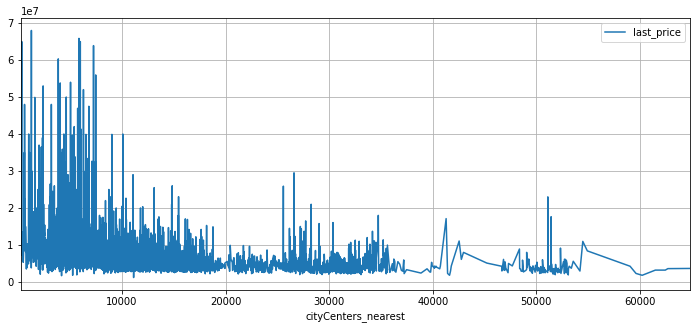

In [23]:
data_good.pivot_table(index='cityCenters_nearest', values='last_price').plot( grid = True, figsize=(12, 5)) 
plt.show()

**В целом в кольце 5000 м до центра цены выше, но есть и всплески стоимости квартир около 27000 и 50000. Люди могут жить роскошно не только в центре, но и в отдельных благополучных районах города и области, эти всплески стоит отдельно сгруппировать и провести анализ отдельно**

Text(0.5, 1.0, 'Распределение цен в зависимости от этажа')

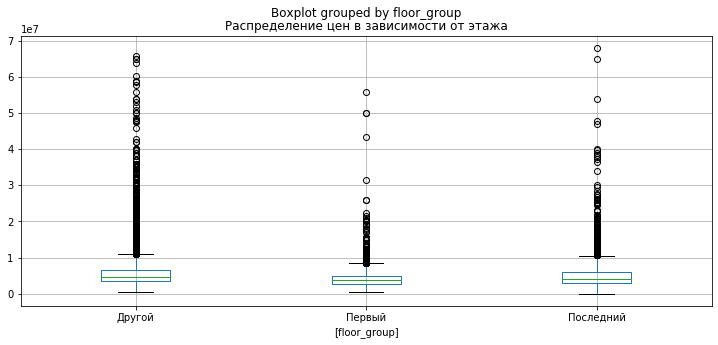

In [24]:
#data_good.pivot_table(index='floor_group', values='last_price').plot( grid = True, figsize=(12, 5)) 
data_good.boxplot(column= ['last_price'], by=['floor_group'],figsize=(12, 5)).set_title('Распределение цен в зависимости от этажа') 

** Первый этаж всегда дешевле.

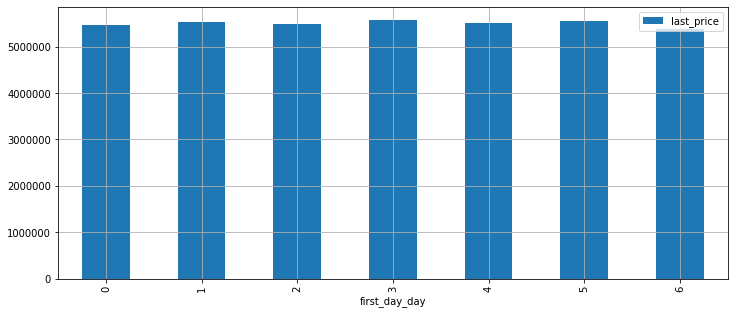

In [25]:
data_good.pivot_table(index='first_day_day', values='last_price', ).plot(kind = 'bar', grid = True, figsize=(12, 5))
def time_att(column, values ):     #функция, которая строит граик зависимости в таблице data_good 
    data_good.pivot_table(index=column, values=values, ).plot(kind = 'bar', grid = True, figsize=(12, 5))

**Средняя цена по дням недели не меняется**

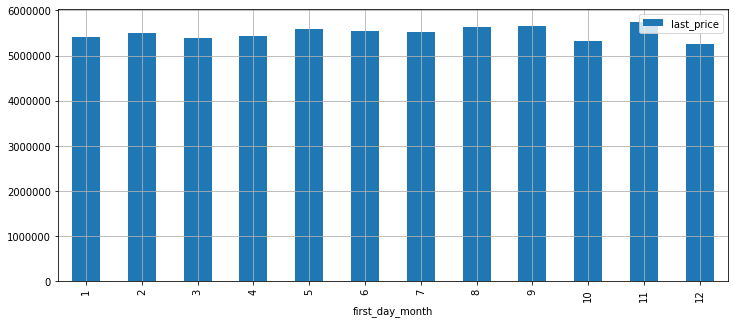

In [26]:
time_att('first_day_month','last_price')

**По месяцам примерн одинаковое распределение**

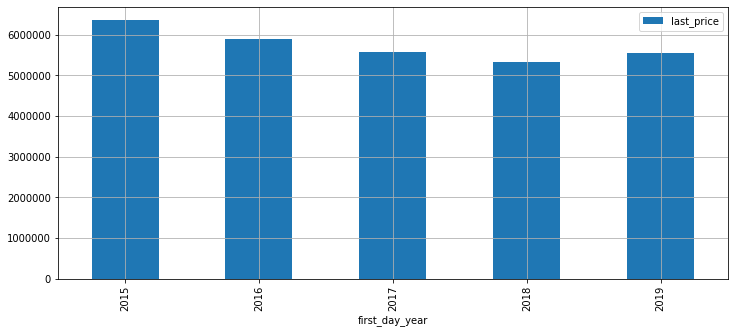

In [27]:
time_att('first_day_year','last_price')

**По годам видно спад стоимости жилья в целом до 2018 года, и затем намечается рост в 2019**

<font color='black'>Построим матрицу корреляции для определения зависимостей между этими данными.</font>

In [ ]:
data_time_corr = data_good[['first_day_day','first_day_month','first_day_year','last_price']]
pd.plotting.scatter_matrix(data_time_corr, figsize=(12, 12))
plt.show()

делаем выводы по корреляции:

- наибольшее количесвто объявлений опубликовано в чт, наименьшее в вс
- в зависимости от цена/день_недели примерно одинаковые данные, и видно, что  в вс нет выбросов по цене
- в янврае и декабре больше всего объявлений. в апреле наименьшее количество
- особой зависимости месяца от цены нет
- Больше всего объявлений было в 2018 году, наиментшее в 2015
- По средним показателям зависмости цены от года, мы наблюдали снижение цен от 2015 к 2018 и далее подъем, распределение же показывает, что с 2015-17 года, было больше дорогих квартирЮ тогда как к 2018-19 гг их стало меньше, возможно, это и повлияло на снижение средней цены по годам

In [29]:
city_list = data_good.locality_name.value_counts().head(10)
data_topcity = data_good.query('locality_name in @city_list.index')

In [30]:
mean_local = data_topcity.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = 'mean',).sort_values(by = 'last_price', ascending = False)
mean_local

,last_price
locality_name,
Санкт-Петербург,6.568325e+06
Пушкин,5.699455e+06
посёлок Парголово,4.362425e+06
деревня Кудрово,4.276906e+06
посёлок Шушары,4.045390e+06
Колпино,3.796778e+06
Всеволожск,3.720043e+06
посёлок Мурино,3.632212e+06
Гатчина,3.310114e+06


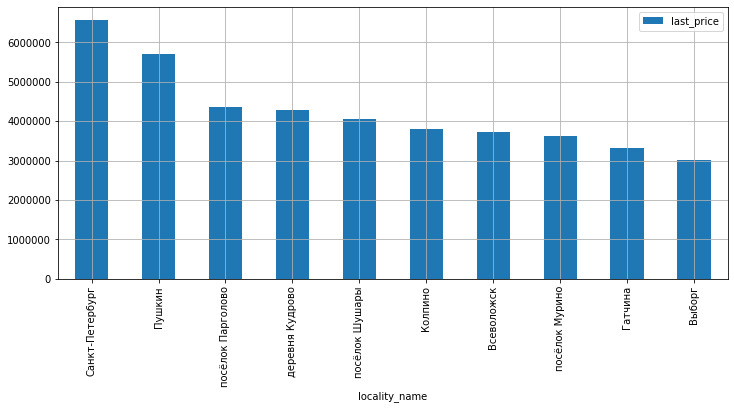

In [31]:
mean_local.plot(kind = 'bar', grid = True, figsize=(12, 5))

**Ожидаемо, средняя цена в СПб самая высокая, Выборг в топ - 10, но на грани 11го места**


In [32]:
data_spb = data_good.query('locality_name == "Санкт-Петербург"').reset_index()
data_spb.cityCenters_nearest.isna().sum() # девятнадцать пустых значений, можм пренеберчь
data_spb.cityCenters_nearest.dropna().reset_index(drop = True).astype('int')
data_spb['km_to_centers'] = (data_spb['cityCenters_nearest']/1000).round()
data_good['km_to_centers'] = (data_good['cityCenters_nearest']/1000).round()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


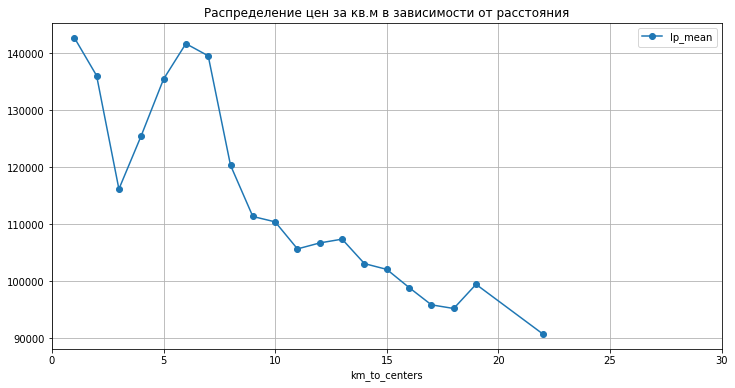

Text(0.5, 1.0, 'Количество объявлений на каждом км ')

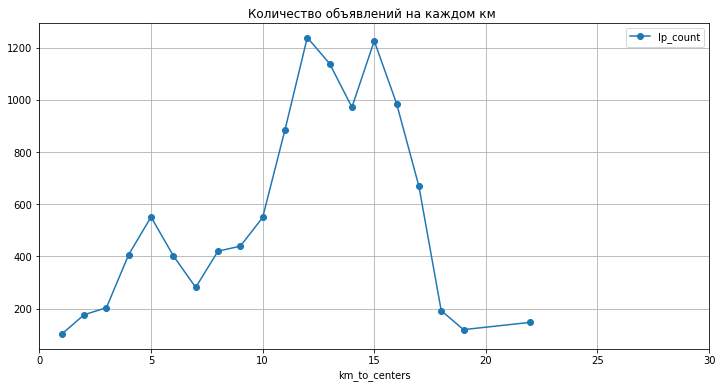

In [33]:
km_pivot = data_spb.pivot_table(index ='km_to_centers', values = 'price_per_meter', aggfunc = ['mean','count'] ).reset_index()
                   


km_pivot.columns = ['km_to_centers','lp_mean', 'lp_count']

km = km_pivot.query('lp_count > 100') 
km.sort_values(by = 'km_to_centers').plot(x='km_to_centers', y = 'lp_mean', style='o-', xlim = (0,30), grid = True, figsize=(12,6) ).set_title('Распределение цен за кв.м в зависимости от расстояния') 
plt.show()        
km.sort_values(by = 'km_to_centers').plot(x='km_to_centers', y = 'lp_count', style='o-', xlim = (0,30), grid = True, figsize=(12,6)).set_title('Количество объявлений на каждом км ') 



**Не смотря на падения граика в области 3 км, считаю правильным принять центр в радиусе 6 км включительно**

In [34]:
data_center = data_spb.query('km_to_centers < 7')                 # выделим квартиры в центре
data_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1851 entries, 7 to 11412
Data columns (total 31 columns):
index                   1851 non-null int64
total_images            1851 non-null int64
last_price              1851 non-null float64
total_area              1851 non-null float64
first_day_exposition    1851 non-null datetime64[ns]
rooms                   1851 non-null int64
ceiling_height          1851 non-null float64
floors_total            1847 non-null float64
living_area             1851 non-null float64
floor                   1851 non-null int64
is_apartment            227 non-null object
studio                  1851 non-null bool
open_plan               1851 non-null bool
kitchen_area            1851 non-null float64
balcony                 1851 non-null float64
locality_name           1851 non-null object
airports_nearest        1849 non-null float64
cityCenters_nearest     1851 non-null float64
parks_around3000        1851 non-null float64
parks_nearest           1224

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f492c097b50>,
      dtype=object)

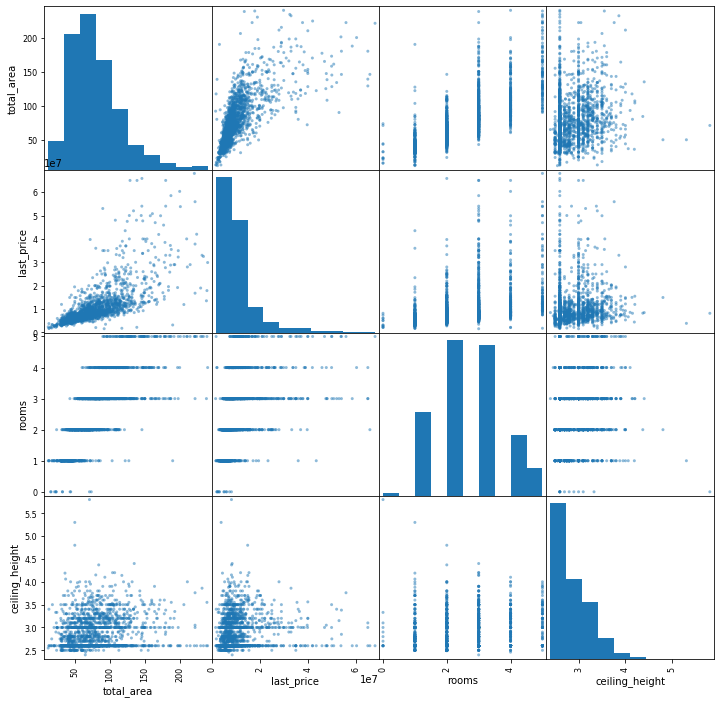

In [35]:
datacenter_corr = data_center[['total_area','last_price','rooms','ceiling_height']].reset_index(drop = True)
data_good_corr = data_good[['total_area','last_price','rooms','ceiling_height']].reset_index(drop = True)
#datacenter_corr.corr()
pd.plotting.scatter_matrix(datacenter_corr, figsize=(12, 12))
plt.show()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4923fcdb90>,
      dtype=object)

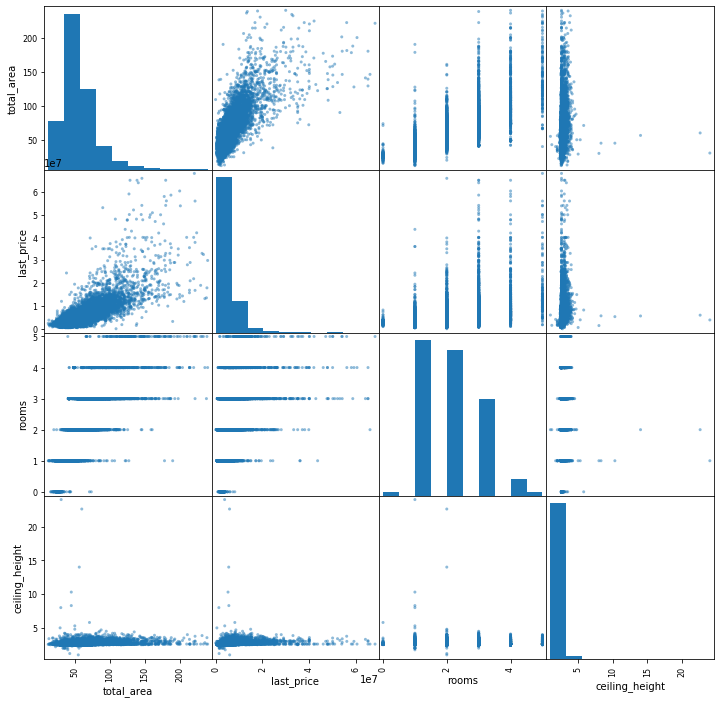

In [36]:
pd.plotting.scatter_matrix(data_good_corr, figsize=(12, 12))
plt.show()

**Можно сделать следующие выводы:**
    - Цена имеет явную корреляцию от площади на квартрах до 120 кв.м, далее начинается большой разброс, что видно да гистограмме
    - Общая площадь и число комнат показаны линиями на графике, можно понять, что например однокомнатные квартиры бывают разных площадей, но в целом, отрезки линий смещаются вверх, поэтому можно назвать логичным вывод, что с увеличением площади, увеличивается число комнат
    -  При изучении зависимости высоты потолков от общей площади, среди разброса показателей видно большое число объевлений с разной площадью, но одинаковой высотой потолков 2.5 метра (кв от 25 до 65 кв.м), 2.7 м и 3 м
    -  Цены за квартиру меняются, даже при одном количесвте комнат, но в целом, есть тенденция на то что квартиры с большим количеством комнат могут быть дороже
    -  Количество комнат не зависит от высоты потолков
       


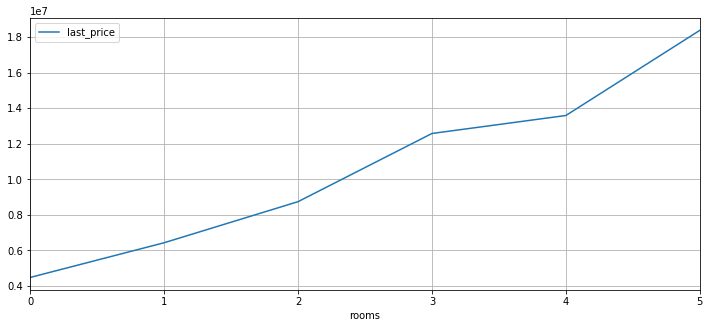

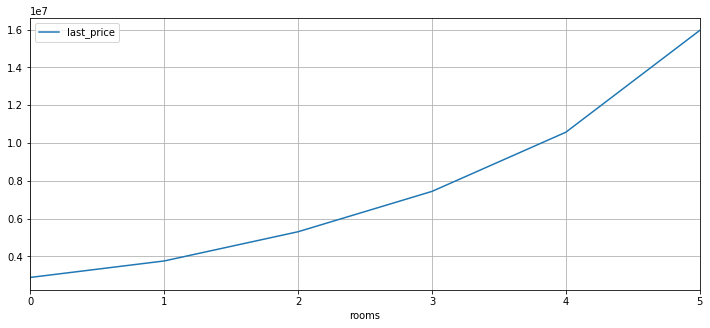

In [37]:
def cal_relation(df, column, values):              #функция, которая строит граик зависимости, требуемых величин
    df.pivot_table(index=column, values=values, ).plot( grid = True, figsize=(12, 5))
cal_relation(data_center, 'rooms', 'last_price')

cal_relation(data_good, 'rooms', 'last_price')
#data_center.pivot_table(index='rooms', values='last_price').plot( grid = True, figsize=(12, 5))

**По всем данным график более плаынй, чем по центру - 3кк в центре чуть дороже**

Text(0.5, 1.0, 'Распределение цен в зависимости от этажа по всем данным')

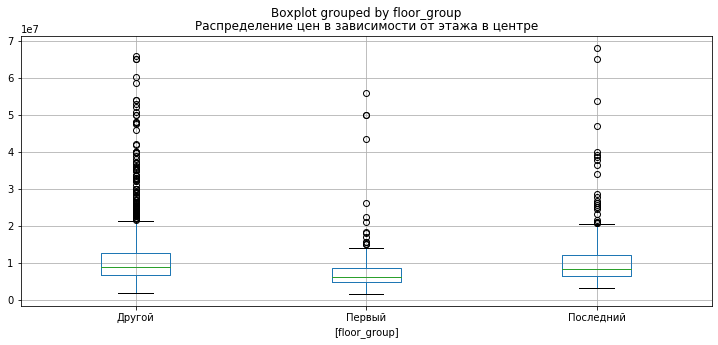

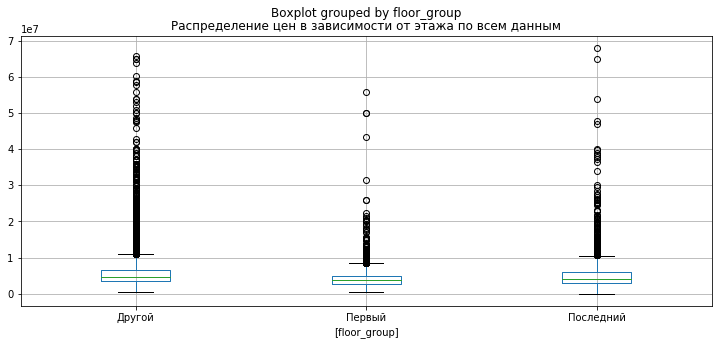

In [38]:
data_center.boxplot(column= ['last_price'], by=['floor_group'],figsize=(12, 5)).set_title('Распределение цен в зависимости от этажа в центре')

data_good.boxplot(column= ['last_price'], by=['floor_group'],figsize=(12, 5)).set_title('Распределение цен в зависимости от этажа по всем данным')

**Тенденции зависмости этажа от цены одинаковы в центре и во всех районах**

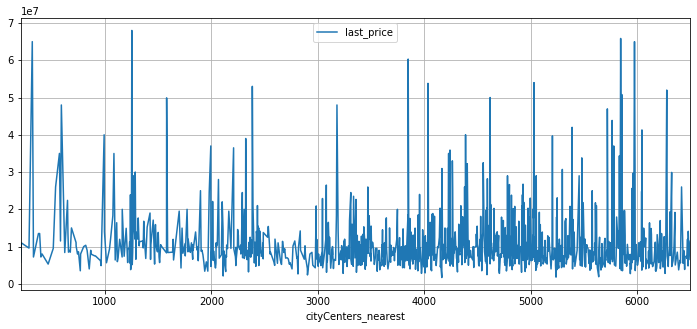

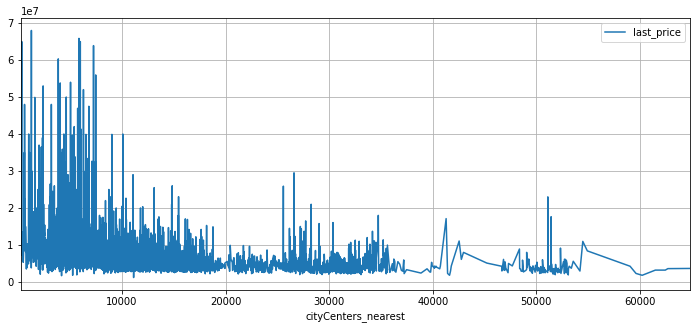

In [39]:
cal_relation(data_center, 'cityCenters_nearest', 'last_price')

cal_relation(data_good, 'cityCenters_nearest', 'last_price')

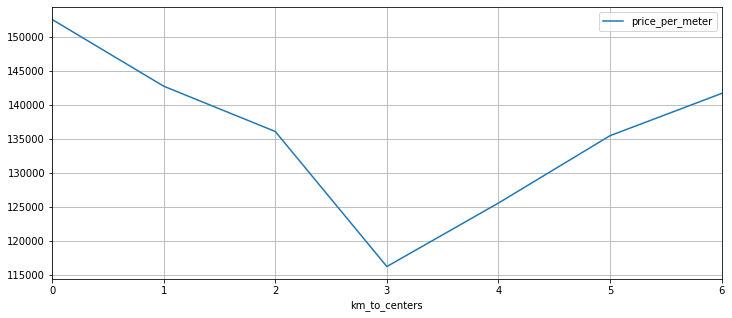

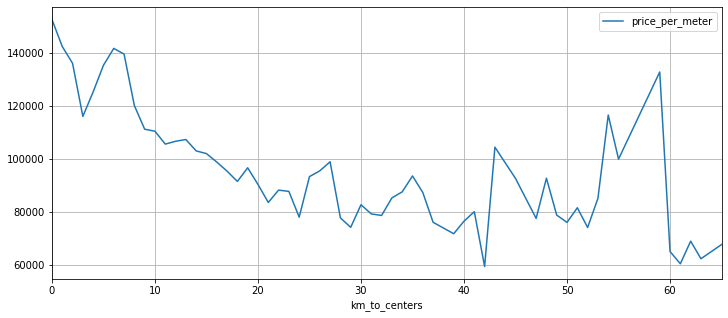

In [40]:
cal_relation(data_center, 'km_to_centers', 'price_per_meter')

cal_relation(data_good, 'km_to_centers', 'price_per_meter')

**Изучив график мы видим, что в центре цена за кв м проседает на 3 км, а по всем даннм можно увидеть вспелски стоимости кв м на 27, 35, 43 и 60 км.**

**При рассмотрении центра мы видим достаточно большой разброс цен, но при сравнении с общими данными понятно, что в целом дорогих квартир больше в центре затем их число снижается ,также видно, есть дорогое жилье в районе 27 км от центра и 52 км**

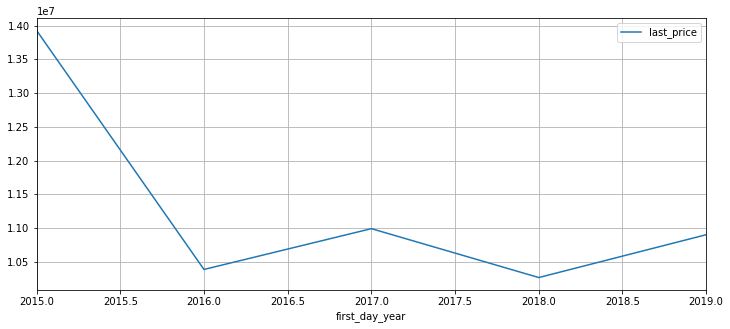

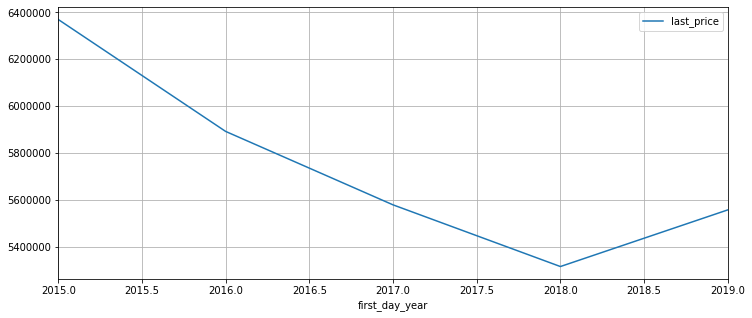

In [41]:
cal_relation(data_center, 'first_day_year', 'last_price')

cal_relation(data_good, 'first_day_year', 'last_price')

   **При рассмотрении информации по дате публикации график получается неинформативным, поэтому увеличим масштаб и посмотрим динамику по годам:**
    
    - в целом, тенденции одинаковы, идет снижение цен от 2015 года к 2018 и затем график идет вверх, но по центру СПб был небольшой всплеск в 2017 году, возможно это было связано с переездом Газпрома в СПб или перед ЧМ-2018
    
    Таким образом, можем сказать что цена квартира по центру может очень сильно отличаться, тогда как за пределами центра видно снижении цена в зависмости от удаления, остальные же зависмости совпадают, как в центре, так и по всем данным
    - Также мы видим, что в центре преобладают двухкомнатные квартиры, когда во всех данных больше однокомнатных
    - Распространенная площадь в центре 50 квм, по всем данным 70.
    

### Шаг 5. Общий вывод

Таким образом:
- я осмотрел данные, исправил по необходимости типы данных и заполнил пропуски, проанализировав, причину их происхождения.
- По всем даннм был проведен расчет стоимости квадратного метрацену квадратного метра, выделен день недели месяц и год публикации объявления, проведена группировка по этажу, расчитано соотношение жилой и общей площади, а также отношение площади кухни к общей.
- Выделил данные по центру и правел сравнительный анализ зависимости стоимости квартиры от таких параметров как, 
     размер,  количество комант, этаж, удаленность от  центра.
- Выделил районы с самой дорогой и самой дешевой средней стоимостью квартир
    
    

### Проведя аналитику данных сервиса  можно сделать следующие выводы:


 - стоимость квартир сильно зависит от их размера, этажа, удаленности от центра города  
 - стоимость квартир малозависит от количества комнат в квартире, дня недели и месяца публикации объявления   
 - С 2015-2018 год был спад цен на жилую недвижимость в Лен обл и СПб, но в центре в 2017 году был небольшой подьем,
 но спад средней цены был вызван снижением в объявлениях количества сверхдорогих квартир
 - В центре преобладают 1-комнатные квартиры, тогда как по остальному городу и области 2-комнатные
 - Наибольшее количесвто объявлений опубликовано в чт, наименьшее в вс
 - Медианное время продажи квартиры - три месяца, среднее - шесть.Очень долгим можно считать процесс продажи, затянувшийся более чем на 400 дней.Быстрые продажи - меньше чем за месяц.